# Analysing Death Data Set.


### Lets start by importaing libraries

In [1]:
# read in libraries and import csv file.
import pandas as pd
aus = pd.read_csv('australia.csv')
newz = pd.read_csv('newzealand.csv')
uk = pd.read_csv('uk.csv')
can = pd.read_csv('canada.csv')
us = pd.read_csv('unitedstates.csv')
allCount = pd.read_csv('combine.csv')



/Users/dhyandarji/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=57f7bcb93ae6b1c0e70beb191bf8669a381fbb1917cc7deed73558b240597c71
  Stored in directory: /Users/dhyandarji/Library/Caches/pip/wheels/30/33/46/5ab7eca55b9490dddbf3441c68a29535996270ef1ce8b9b6d7
Successfully built ffmpeg
Password:



### Now lets remove the uncessary columns

In [6]:
# format the data to only keep columns of value.

aus = aus[["Year","Cause of death (WHO)","Country or Area","Value"]].dropna()

newz = newz[["Year","Cause of death (WHO)","Country or Area","Value"]].dropna()

uk = uk[["Year","Cause of death (WHO)","Country or Area","Value"]].dropna()

can = can[["Year","Cause of death (WHO)","Country or Area","Value"]].dropna()

us = us[["Year","Cause of death (WHO)","Country or Area","Value"]].dropna() 

allCount = allCount[["Year","Cause of death (WHO)","Country or Area","Value"]].dropna()



### Lets start with racing bar graph


In [8]:

#install required libraries for plotting.

import matplotlib.pyplot as plt

## time to install bar plot api
!pip install bar_chart_race

import bar_chart_race as bcr






### Let us create a histogram for all countries 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 132 missing from current font.

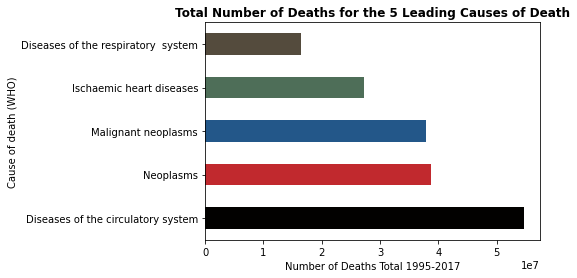

In [244]:
#import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Remove vague data points and clean up repetition in the data.

totalCauseHist = allCount.sort_values(by=['Value'],ascending=False)
totalCauseHist = totalCauseHist[totalCauseHist["Cause of death (WHO)"]!='All causes, ICD10']
totalCauseHist = totalCauseHist[totalCauseHist["Cause of death (WHO)"]!='All causes, ICD9']
totalCauseHist = totalCauseHist[totalCauseHist["Cause of death (WHO)"]!='External causes, ICD10']
totalCauseHist = totalCauseHist[totalCauseHist["Cause of death (WHO)"]!='External causes, ICD9']
totalCauseHist['Cause of death (WHO)'] = totalCauseHist['Cause of death (WHO)'].str.replace(', ICD9','')
totalCauseHist['Cause of death (WHO)'] = totalCauseHist['Cause of death (WHO)'].str.replace(', ICD10','')


# group the dataset according to the cause of death.
j = totalCauseHist.groupby(['Cause of death (WHO)'], as_index=False).sum()

#j5 = totalCauseHist.groupby(["Year","Cause of death (WHO)"],as_index=False).sum()

# group according to year and cause of death

j5 = pd.read_csv('j10.csv')

j5 = j5.groupby(["Year","Cause of death (WHO)"],as_index=False).sum()

# reshape data frame so that the format matches what is required for racing bar graph.
jnew = j5.pivot(index='Year', columns='Cause of death (WHO)', values='Value')

totalCauseHist.to_csv('totalCauseHist.csv')

jnew.to_csv('letsgo2.csv')



# racing bar graph, high dpi for high quality output.
bcr.bar_chart_race(df=jnew,filename='video.mp4',n_bars=5,dpi=400,period_length=1000,steps_per_period=100,title='Top 5 Leading Causes of Death For AU/UK/CAN/NZ/USA (1995-2017)')




#color=['#8a3ffc','#33b1ff','#007d79','#ff7eb6','#fa4d56','#fff1f1','#6fdc8c','#4589ff','#d12771','#d2a106']


# Plot total deaths across the entire time frame.
j2.plot(kind='barh',x='Cause of death (WHO)', y= 'Value', legend=False,alpha = 1, color=['#020100','#C1292E','#235789','#4E6E58','#544B3D','#F17F29','#F96900','#DCE2C8','#A8DCD1','#65DEF1'])
plt.xlabel("Number of Deaths Total 1995-2017")
plt.title("Total Number of Deaths for the 5 Leading Causes of Death",fontweight="bold")
plt.savefig('graph.png',dpi=1200,bbox_inches='tight')
plt.show()



### Create world map

In [14]:

#!pip install cairosvg

# Sort cause of death for New Zealand
newz = newz[newz["Cause of death (WHO)"]!='All causes, ICD10']
newz = newz[newz["Cause of death (WHO)"]!='All causes, ICD9']
newz = newz[newz["Cause of death (WHO)"]!='External causes, ICD10']


nwMax = newz.groupby(['Cause of death (WHO)']).sum()

nwMax = nwMax.sort_values(by=['Value'],ascending=False)



# Sort cause of death for Australia 
aus = aus[aus["Cause of death (WHO)"]!='All causes, ICD10']
aus = aus[aus["Cause of death (WHO)"]!='All causes, ICD9']
aus = aus[aus["Cause of death (WHO)"]!='External causes, ICD10']


ausMax = aus.groupby(['Cause of death (WHO)']).sum()

ausMax = ausMax.groupby(['Cause of death (WHO)']).sum()

ausMax = ausMax.sort_values(by=['Value'],ascending=False)

# Sort cause of death for UK


uk = uk[uk["Cause of death (WHO)"]!='All causes, ICD10']
uk = uk[uk["Cause of death (WHO)"]!='All causes, ICD9']
uk = uk[uk["Cause of death (WHO)"]!='External causes, ICD10']


ukMax = uk.groupby(['Cause of death (WHO)']).sum()

ukMax = ukMax.groupby(['Cause of death (WHO)']).sum()

ukMax = ukMax.sort_values(by=['Value'],ascending=False)

# Sort cause of death for Canada


can = can[can["Cause of death (WHO)"]!='All causes, ICD10']
can = can[can["Cause of death (WHO)"]!='All causes, ICD9']
can = can[can["Cause of death (WHO)"]!='External causes, ICD10']


canMax = can.groupby(['Cause of death (WHO)']).sum()

canMax = canMax.groupby(['Cause of death (WHO)']).sum()

canMax = canMax.sort_values(by=['Value'],ascending=False)

# Sort cause of death for US


us = us[us["Cause of death (WHO)"]!='All causes, ICD10']
us = us[us["Cause of death (WHO)"]!='All causes, ICD9']
us = us[us["Cause of death (WHO)"]!='External causes, ICD10']


usMax = us.groupby(['Cause of death (WHO)']).sum()

usMax = usMax.groupby(['Cause of death (WHO)']).sum()

usMax = usMax.sort_values(by=['Value'],ascending=False)




# Install libraries for world map.
!pip install pygal_maps_world

!pip install pygal

import pygal

from pygal.maps.world import World

from pygal.style import Style


# setup colours and font size.
new_style= Style(legend_font_size=10,colors=('#264653','#2A9D8F','#E9C46A','#F4A261','#E76F51'))

# create world map
deathMap= World(truncate_legend=100,legend_at_bottom=True,legend_size=10,style=new_style)

# Add title and data points to the map.
deathMap.title = "Comparison of Leading Cause of Death for Australia, Canada, UK, USA, NZ"

deathMap.add('Circulatory system diseases',['nz'])

deathMap.add('Circulatory system diseases',['au'])

deathMap.add('Circulatory system diseases',['gb'])

deathMap.add('Neoplasms',['ca'])

deathMap.add('Circulatory system diseases',['us'])


# render and output the file 

deathMap.render_to_file('deathmap.svg')

deathMap.render_to_png('deatmap2.png',dpi=1200)


In [ ]:
###Racing Bar Graph

us = us[us["Cause of death (WHO)"]!='All causes, ICD9']


data1995 = totalCauseHist[totalCauseHist['Year']=='1995']